## summary of project
**compared five SOTA models for summarization task**
* T-5
* bart
* pegasus
* longformer
* gpt2


* Transformers is all you need

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


## Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading Data 

In [3]:
from datasets import load_dataset

bbc_news = load_dataset("gopalkalpande/bbc-news-summary")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/gopalkalpande--bbc-news-summary-2a01b492fd0ba579/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

## visualizing data

In [4]:
bbc_news['train'][0]

{'File_path': 'politics',
 'Articles': 'Budget to set scene for election..Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour...Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare...- Increase in the stamp duty threshold from £60,000. - A freeze on petrol duty. - An extension of tax credit scheme for poorer families. - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buye

<Axes: ylabel='count'>

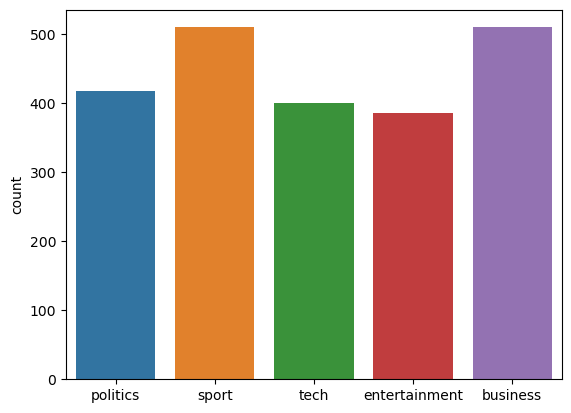

In [5]:
category_train = bbc_news['train']['File_path']
sns.countplot(x=category_train)

In [6]:
bbc_news.set_format(type='pandas')
df_train = bbc_news['train'][:]


## Preprocessing dataset

In [7]:
import re
import nltk
nltk.download('punkt')
!pip install contractions
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltk.tokenize import sent_tokenize
from datasets import Dataset,DatasetDict
def remove_stopwords(text):
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    processed_text = [word for word in words if word not in stopwords.words('english')]
    processed_text = [ lemmatizer.lemmatize(word) for word in processed_text]
    return ' '.join(processed_text)
def pre_process_df(df1):
    df = df1.copy()
    for col in ['Articles']:
        df[col] = df[col].apply(lambda x: contractions.fix(x))
        df[col] = df[col].apply(str.lower)
        df[col] = df[col].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))
        df[col] = df[col].apply(lambda x: remove_stopwords(x))
        df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x))
    return df

bbc_news_gpt = pre_process_df(df_train)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.5 MB/s eta 0:00:00
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  


In [8]:
def pre_process_exceptgpt(df1):
    df = df1.copy()
    prefix = "summarize: "
    for col in ['Articles']:
        df[col] = df1[col].apply(lambda x: prefix+x)
    return df
bbc_news_train = pre_process_df(pre_process_exceptgpt(df_train))

In [9]:
def add_text(df1):
    df = df1.copy()
    list_text = []
    for article,summary in zip(df['Articles'],df['Summaries']):
        new_text = article + " TL;DR " + summary
        list_text.append(new_text)
    df['new_text'] = list_text
    return df 
bbc_news_gpt2 = add_text(bbc_news_gpt)

In [10]:
bbc_news_data = bbc_news['train'][:]

## Domains of news

In [11]:
lst = ['politics','sport','tech','entertainment','business']
idx = {}
for domain in lst :
    idx[domain] = bbc_news_train[bbc_news_train['File_path']==domain].index[0]
    print(idx[domain])


0
417
927
1328
1714


## MODELS

* pipeline for all 5-models

In [13]:
from transformers import pipeline
gen_kwargs = {"length_penalty":0.8 ,"max_length" :120 , "min_length" : 60 }
t5_id = '/kaggle/input/summarizer-t5/t5-base-finetuned-bbc-lemmatized/checkpoint-1000'
bart_id = '/kaggle/input/summarizer-bart/bart-large-cnn-finetuned-bbc-lemmatized/checkpoint-1500'
pegasus_id ='/kaggle/input/summarize-pegasus/pegasus-cnn_dailymail-finetuned-bbc-lemmatized/checkpoint-1000'
longformer_id = '/kaggle/input/summarizer-longformer/led-base-16384-finetuned-bbc-lemmatized/checkpoint-6500'
gpt2_id = '/kaggle/input/summarizer-gpt2/gpt2-medium-finetuned-bbc-lemmatized/checkpoint-11500'
t5_summary = pipeline("summarization", model=t5_id)
bart_summary = pipeline("summarization", model=bart_id)
pegasus_summary = pipeline("summarization", model=pegasus_id)
longformer_summary = pipeline("summarization", model=longformer_id)
gpt2_summary = pipeline("text-generation", model=gpt2_id)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


* evaluation metric

In [14]:
from torchmetrics.text.rouge import ROUGEScore
rouge = ROUGEScore()

* function for printing summaries and their scores for all 5 models

In [15]:
def print_summary(idx):
    article = bbc_news_data['Articles'][idx]
    review = bbc_news_gpt['Articles'][idx]
    summary = bbc_news_data['Summaries'][idx]
    
    
    summary_t5 = t5_summary(bbc_news_train["Articles"][idx],**gen_kwargs)[0]["summary_text"]
    summary_bart = bart_summary(bbc_news_train["Articles"][idx],**gen_kwargs)[0]["summary_text"]
    summary_pegasus = pegasus_summary(bbc_news_train["Articles"][idx],**gen_kwargs)[0]["summary_text"]
    summary_longformer = longformer_summary(bbc_news_train["Articles"][idx],**gen_kwargs)[0]["summary_text"]
    summary_gpt2 = gpt2_summary(bbc_news_gpt2["new_text"][idx],**gen_kwargs)[0]["generated_text"]
    final_gpt2 = summary_gpt2.replace(review + ' TL;DR ', ' ')


    rogue_t5 = rouge(summary,summary_t5)
    result_t5 = {key: value.numpy() * 100 for key, value in rogue_t5.items()}
    result_t5 = { k: round(v, 4) for k, v in result_t5.items() }
    
    
    rogue_bart = rouge(summary,summary_bart)
    result_bart = {key: value.numpy() * 100 for key, value in rogue_bart.items()}
    result_bart = { k: round(v, 4) for k, v in result_bart.items() }
    
    rogue_pegasus = rouge(summary,summary_pegasus)
    result_pegasus = {key: value.numpy() * 100 for key, value in rogue_pegasus.items()}
    result_pegasus = { k: round(v, 4) for k, v in result_pegasus.items() }
    
    
    rogue_longformer = rouge(summary,summary_longformer)
    result_longformer = {key: value.numpy() * 100 for key, value in rogue_longformer.items()}
    result_longformer = { k: round(v, 4) for k, v in result_longformer.items() }
    
    
    rogue_gpt2 = rouge(summary,final_gpt2)
    result_gpt2= {key: value.numpy() * 100 for key, value in rogue_gpt2.items()}
    result_gpt2 = { k: round(v, 4) for k, v in result_gpt2.items() }
    
    
    print(f"'>>> article: {article}'")
    
    
    print(f"\n'>>> Summary_t5: {summary_t5}'")
    print('>>T5_rogue1 : ',result_t5['rouge1_fmeasure'])
    print('>>T5_rogueL : ',result_t5['rougeL_fmeasure'])
    
    
    print(f"\n'>>> Summary_bart: {summary_bart}'")
    print('>>bart_rogue1 : ',result_bart['rouge1_fmeasure'])
    print('>>bart_rogueL : ',result_bart['rougeL_fmeasure'])
    
    
    print(f"\n'>>> Summary_pegasus: {summary_pegasus}'")
    print('>>pegasus_rogue1 : ',result_pegasus['rouge1_fmeasure'])
    print('>>pegasus_rogueL : ',result_pegasus['rougeL_fmeasure'])
    
    
    print(f"\n'>>> Summary_longformer: {summary_longformer}'")
    print('>>longformer_rogue1 : ',result_longformer['rouge1_fmeasure'])
    print('>>longformer_rogueL : ',result_longformer['rougeL_fmeasure'])
    
    print(f"\n'>>> Summary_gpt2: {final_gpt2}'")
    print('>>gpt2_rogue1 : ',result_gpt2['rouge1_fmeasure'])
    print('>>gpt2_rogueL : ',result_gpt2['rougeL_fmeasure'])

In [16]:
print_summary(idx['politics'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 600, but `max_length` is set to 120. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


'>>> article: Budget to set scene for election..Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour...Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare...- Increase in the stamp duty threshold from £60,000. - A freeze on petrol duty. - An extension of tax credit scheme for poorer families. - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance

In [17]:
print_summary(idx['tech'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 656, but `max_length` is set to 120. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


'>>> article: Digital UK driven by net and TV..The UK's adoption of digital TV and broadband has helped make it the fourth most digitally-savvy nation in Europe, according a report by Jupiter Research...But the UK still lags in terms of broadband speeds compared to others. The most digitally sophisticated Europeans, in terms of use of digital goods such as mobiles, TV, net and cameras, are the Scandinavians. About 14 million households in the UK, 60%, have digital TV, according to the communications regulator Ofcom. The least digital of the European nations was Greece, in 17th position, according to the Digital Life Index...Scandinavian countries Sweden, Denmark and Norway came out top in the report, but there were some differences in technology trends. "The European Digital Life Index demonstrates that digital lifestyles are common today, but across Europe there is no single digital lifestyle," said Nate Elliott, Jupiter analyst. "Consumers adopt different digital products and service

In [18]:
print_summary(idx['sport'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 357, but `max_length` is set to 120. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


'>>> article: Hodges announces rugby retirement..Scarlets and USA Eagles forward Dave Hodges has ended his playing career to pursue a coaching role in the States...The 36-year-old, who has 54 caps, was Llanelli's player of the season in 2001/2, but has battled injury for the last two of his seven years at Stradey. He tore a pectoral muscle against the Ospreys on Boxing Day, an injury that would have kept him out for the season. "Realising I would be unable to play this season, the club and I agreed to end my contract early," said Hodges..."It allows me to move back to the US and pursue opportunities there and allows the Scarlets to look to the next generation." The Scarlets have begun to rebuild their squad for next season after a disappointing Heineken Cup campaign, with plenty more signings and departures expected in the coming weeks...Scarlets chief executive Stuart Gallacher confirmed that 17 of the current squad would be out of contract in the summer. "We have a deliberate policy 

In [19]:
print_summary(idx['entertainment'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 356, but `max_length` is set to 120. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


'>>> article: Super Size Me wins writers' award..Super Size Me director Morgan Spurlock has won the Writers Guild of America's award for documentary feature writing...The Oscar-nominated film followed Spurlock as he ate only McDonald's fast food for an entire month. Spurlock was given the award at a special ceremony at the Roosevelt Hotel in Hollywood on Tuesday. Organisers said the rising popularity of documentary films led them to honour a writer for a documentary screenplay for the first time...Producer Brian Grazer presented the award to Spurlock and the film's backers, Roadside Attractions, Samuel Goldwyn Films and Showtime Independent Films. Spurlock set out to discover the effect of living on nothing but McDonald's for a month, upgrading to supersize portions when offered. The film followed his 25lb weight gain and the health effects on his body, including his liver and cholesterol levels. McDonald's announced it was to scrap its "supersized" meals last year, but denied the move

In [20]:
print_summary(idx['business'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 311, but `max_length` is set to 120. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


'>>> article: US consumer confidence up..Consumers' confidence in the state of the US economy is at its highest for five months and they are optimistic about 2005, an influential survey says...The feel-good factor among US consumers rose in December for the first time since July according to new data. The Conference Board survey of 5,000 households pointed to renewed optimism about job creation and economic growth. US retailers have reported strong sales over the past 10 days after a slow start to the crucial festive season...According to figures also released on Tuesday, sales in shopping malls in the week to 25 December were 4.3% higher than in 2003 following a last minute rush. Wal-Mart, the largest US retailer, has said its December sales are expected to be better than previously forecast because of strong post-Christmas sales...It is expecting annual sales growth of between 1% and 3% for the month. Consumer confidence figures are considered a key economic indicator because consume